In [2]:
class Node(object):
    """This class represents a node in a graph."""

    def __init__(self, label: str=None):
        """
        Initialize a new node.

        Args:
            label: the string identifier for the node
        """
        self.label = label
        self.children = []

    def __lt__(self,other):
        """
        Perform the less than operation (self < other).

        Args:
            other: the other Node to compare to
        """
        return (self.label < other.label)

    def __gt__(self,other):
        """
        Perform the greater than operation (self > other).

        Args:
            other: the other Node to compare to
        """
        return (self.label > other.label)

    def __repr__(self):
        """Return a string form of this node."""
        return '{} -> {}'.format(self.label, self.children)

    def add_child(self, node, cost=1):
        """
        Add a child node to this node.

        Args:
            node: the node to add to the children
            cost: the cost of the edge (default 1)
        """
        edge = Edge(self, node, cost)
        self.children.append(edge)


class Edge(object):
    """This class represents an edge in a graph."""

    def __init__(self, source: Node, destination: Node, cost: int=1):
        """
        Initialize a new edge.

        Args:
            source: the source of the edge
            destination: the destination of the edge
            cost: the cost of the edge (default 1)
        """
        self.source = source
        self.destination = destination
        self.cost = cost

    def __repr__(self):
        """Return a string form of this edge."""
        return '{}: {}'.format(self.cost, self.destination.label)


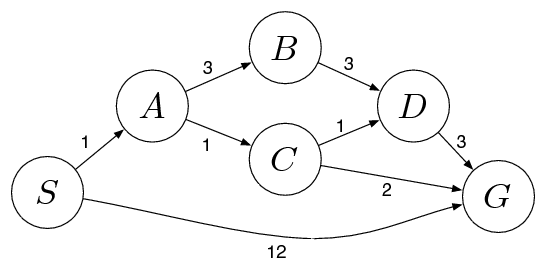

Create all the nodes

In [3]:
S = Node('S')
A = Node('A')
B = Node('B')
C = Node('C')
D = Node('D')
G = Node('G')

In [4]:
type(S)

__main__.Node

create all the edges

In [6]:
S.add_child(A, 1)
S.add_child(G, 12)

A.add_child(B, 3)
A.add_child(C, 1)

B.add_child(D, 3)

C.add_child(D, 1)
C.add_child(G, 2)

D.add_child(G, 3)

Take a look

In [34]:
_ = [print(node) for node in [S, A, B, C, D, G]]

S -> [1: A, 12: G]
A -> [3: B, 1: C]
B -> [3: D]
C -> [1: D, 2: G]
D -> [3: G]
G -> []


```
UCS(root):
    Insert the root into the queue
    While the queue is not empty
          Dequeue the maximum priority element from the queue
          (If priorities are same, alphabetically smaller path is chosen)
          If the path is ending in the goal state, print the path and exit
          Else
                Insert all the children of the dequeued element, with the cumulative costs as priority
```

In [35]:
from queue import PriorityQueue


def ucs(root, goal):
    """
    Return the uniform cost search path from root to gaol.

    Args:
        root: the starting node for the search
        goal: the goal node for the search

    Returns: a list with the path from root to goal

    Raises: ValueError if goal isn't in the graph
    """
    # create a priority queue of paths
    queue = PriorityQueue()
    queue.put((0, [root]))

    # iterate over the items in the queue
    while not queue.empty():
        # get the highest priority item
        pair = queue.get()


        current = pair[1][-1]

        # if it's the goal, return
        if current.label == goal:
            return pair[1]
        # add all the edges to the priority queue
        for edge in current.children:
            # create a new path with the node from the edge
            new_path = list(pair[1])
            new_path.append(edge.destination)
            # append the new path to the queue with the edges priority
            queue.put((pair[0] + edge.cost, new_path))

In [37]:
ucs(S, 'G')

[S -> [1: A, 12: G], A -> [3: B, 1: C], C -> [1: D, 2: G], G -> []]